In [5]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import VGG19, inception_v3, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

import numpy as np
import os

In [6]:

model = VGG19()

In [7]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

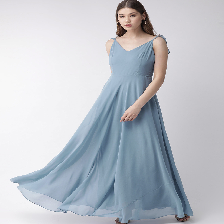

In [8]:
load_img('E:/assi/images/pic_42.jpg', target_size=(224,224))

In [9]:
imagesize = (224,224)
image = load_img('E:/assi/images/pic_42.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

gown With 0.5485229 Confidence


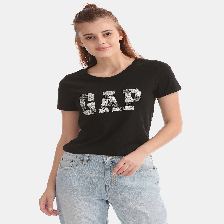

In [10]:

load_img('E:/assi/images/pic_32.jpg', target_size=(224,224))

In [11]:

imagesize = (224,224)
image = load_img('E:/assi/images/pic_32.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

jean With 0.3410875 Confidence


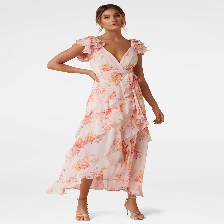

In [12]:

load_img('E:/assi/images/pic_55.jpg', target_size=(224,224))

In [13]:

imagesize = (224,224)
image = load_img('E:/assi/images/pic_55.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

pajama With 0.37884352 Confidence


In [14]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Input

import pandas as pd
import cv2

In [15]:
df = pd.read_excel('E:/assi/dataset.xlsx')

In [16]:
df.head()

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        500 non-null    object
 1   Description  500 non-null    object
 2   Material     500 non-null    object
 3   Pattern      500 non-null    object
 4   Neckline     500 non-null    object
 5   Image_Path   500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [18]:
print('Total Number of Unique value in Material Column:',df.Material.nunique())
print('Total Number of Unique value in Pattern Column:',df.Pattern.nunique())
print('Total Number of Unique value in Neckline Column:', df.Neckline.nunique())

Total Number of Unique value in Material Column: 30
Total Number of Unique value in Pattern Column: 18
Total Number of Unique value in Neckline Column: 22


In [19]:
Materials = np.array(sorted(list(df.Material.unique())))
Materials

array(['Blended Fabric', 'Chiffon', 'Cotton', 'Crepe', 'Crinkled',
       'Denim', 'Georgette', 'Khadi', 'Knitted', 'Lace', 'Leather',
       'Linen', 'Lyocell', 'Modal', 'Net', 'Nylon', 'Organic', 'Organza',
       'Polyamide', 'Polycotton', 'Polyester', 'Poplin', 'Rayon', 'Satin',
       'Sequin', 'Silk', 'Suede', 'Velvet', 'Viscose', 'Wool'],
      dtype='<U14')

In [20]:
Patterns = np.array(sorted(list(df.Pattern.unique())))
Patterns

array(['Animal Print', 'Checks', 'Detailing', 'Embellished/Sequined',
       'Embroidered', 'Floral', 'Geometric', 'Mirror Work', 'Ombre',
       'Patterned', 'Plaid', 'Pleated', 'Polka Dots', 'Printed',
       'Ruffled', 'Solid/Plain', 'Stripes', 'Tie & Dye'], dtype='<U20')

In [21]:
Necklines = np.array(sorted(list(df.Neckline.unique())))
Necklines

array(['Boat Neck', 'Cold Shoulder', 'Collar Neck', 'Cowl Neck',
       'Crew Neck', 'Halter Neck', 'High Neck', 'Hooded', 'Keyhole Neck',
       'Mandarin Neck', 'Off Shoulder', 'One Shoulder', 'Plunging Neck',
       'Queen Anne', 'Round Neck', 'Ruffled Neck', 'Scoop Neck',
       'Shoulder Straps', 'Square Neck', 'Strapless/Tube', 'Sweetheart',
       'V-Neck'], dtype='<U15')

In [22]:
data = list(df['Image_Path'])
label_Material = df["Material"]
label_Pattern = df["Pattern"]
label_Neckline = df["Neckline"]

In [23]:
train = []
for imagePath in data:
    image = cv2.imread("E:/assi"+imagePath)
    image = cv2.resize(image, (224,224))
    image = img_to_array(image)
    train.append(image)

In [24]:
Data = np.array(train)
label_Material = np.array(label_Material)

In [25]:

len(label_Material), len(Data)

(500, 500)

In [26]:
## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Material = lb.fit_transform(label_Material)
Label_Materials = to_categorical(Label_Material)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(Data, Label_Materials, test_size=0.25)

In [28]:
imageGen = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(20, (5,5), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(50, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(500, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

##Outputlayer
model.add(Dense(30, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(imageGen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
12/12 [==============================] - 142s 12s/step - loss: 165.9611 - accuracy: 0.1707 - val_loss: 2040.6879 - val_accuracy: 0.2480
Epoch 2/50
12/12 [==============================] - 165s 14s/step - loss: 163.1552 - accuracy: 0.2267 - val_loss: 2916.1631 - val_accuracy: 0.0160
Epoch 3/50
12/12 [==============================] - 161s 13s/step - loss: 149.7220 - accuracy: 0.2480 - val_loss: 1478.8864 - val_accuracy: 0.2560
Epoch 4/50
12/12 [==============================] - 149s 12s/step - loss: 109.9311 - accuracy: 0.2240 - val_loss: 1648.6792 - val_accuracy: 0.0080
Epoch 5/50
12/12 [==============================] - 150s 13s/step - loss: 107.1854 - accuracy: 0.2160 - val_loss: 1271.2454 - val_accuracy: 0.0480
Epoch 6/50
12/12 [==============================] - 156s 13s/step - loss: 88.0818 - accuracy: 0.2267 - val_loss: 519.8118 - val_accuracy: 0.2480
Epoch 7/50
12/12 [==============================] - 139s 12s/step - loss: 84.8652 - accuracy: 0.2160 - val_loss: 344.276

In [33]:
Train = []
for imagePath in data:
  image = load_img("E:/assi"+ imagePath, target_size=(224,224))
  image = img_to_array(image)
  image = preprocess_input(image)
  Train.append(image)

In [34]:
Image_data = np.array(Train)

In [35]:

generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Materials, test_size=0.25 )

In [37]:
basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))

In [38]:
basemodel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [39]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(30, activation='softmax')(headmodel)

In [40]:
material_model = Model(inputs= basemodel.input, outputs= headmodel)

In [41]:

## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [42]:

material_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PMaterial = material_model.fit_generator(generator.flow(Image_data, Label_Materials, batch_size=32), epochs=50)

Model is gong to train..........
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
16/16 [==============================] - 125s 8s/step - loss: 67.0635 - accuracy: 0.1980
Epoch 2/50
16/16 [==============================] - 129s 8s/step - loss: 34.6803 - accuracy: 0.3300
Epoch 3/50
16/16 [==============================] - 125s 8s/step - loss: 15.6535 - accuracy: 0.3460
Epoch 4/50
16/16 [==============================] - 127s 8s/step - loss: 6.2207 - accuracy: 0.3500
Epoch 5/50
16/16 [==============================] - 132s 8s/step - loss: 3.7500 - accuracy: 0.3140
Epoch 6/50
16/16 [==============================] - 138s 9s/step - loss: 2.7812 - accuracy: 0.3560
Epoch 7/50
16/16 [==============================] - 20025s 1252s/step - loss: 2.5627 - accuracy: 0.3720
Epoch 8/50
16/16 [==============================] - 68s 4s/step - loss: 2.6142 - accuracy: 0.3780
Epoch 9/50
16/16 [==============================] - 74s 5s/step - loss: 2.4044 - accuracy: 0

In [44]:
##Lets predict
image = load_img('E:/assi/images/pic_21.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = material_model.predict(image)
pred

array([[5.41569929e-14, 7.22277562e-08, 4.86544222e-01, 1.39777572e-03,
        1.83514228e-14, 2.36184814e-08, 4.54513952e-07, 1.81540188e-15,
        3.07050698e-07, 7.58289199e-16, 4.82281654e-14, 5.38210035e-04,
        2.12013594e-13, 1.82797649e-11, 1.13512789e-13, 1.66370387e-06,
        3.34451922e-21, 7.86654422e-12, 9.53424487e-14, 2.33858003e-07,
        1.86550140e-01, 9.90653207e-16, 5.88954091e-02, 2.65878134e-06,
        1.04694109e-15, 6.61999643e-13, 5.02418558e-21, 3.15913979e-08,
        2.66068816e-01, 1.35492026e-11]], dtype=float32)

In [58]:
pred_mat = np.argmax(pred)
ypred = Materials[pred_mat]

## Actual Class
actual = df[df['Image_Path'] == '/images/pic_21.jpg']
yactual = actual.Material.values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Knitted pattern.... and the real class is ['Rayon']


In [54]:
##Lets predict for another image
image = load_img('E:assi/images/pic_59.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = material_model.predict(image)
pred

array([[2.02180637e-08, 9.20129366e-07, 4.02322318e-03, 1.22850121e-04,
        7.14861637e-09, 7.18145969e-08, 2.02790190e-07, 8.92566590e-08,
        9.22981501e-01, 1.69077469e-12, 2.05674198e-08, 7.83806445e-06,
        2.84773662e-08, 6.20256014e-06, 8.24959490e-10, 1.58593264e-06,
        1.77287263e-09, 1.97136324e-05, 9.43058865e-07, 3.48803986e-09,
        6.15154617e-02, 9.48684353e-10, 4.43432626e-04, 2.82315305e-03,
        1.79802033e-03, 3.74771186e-10, 9.78359754e-11, 3.95320831e-06,
        6.24049548e-03, 1.04324345e-05]], dtype=float32)

In [56]:
pred_mat = np.argmax(pred)
ypred = Materials[pred_mat]

## Actual Class
actual = df[df['Image_Path'] == '/images/pic_59.jpg']
yactual = actual.Material.values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Knitted pattern.... and the real class is ['Knitted']


In [59]:
material_model.save('Material_model.h5')

In [60]:
lb = LabelEncoder()
Label_Pattern = lb.fit_transform(label_Pattern)
Label_Patterns = to_categorical(Label_Pattern)

In [61]:
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Patterns, test_size=0.25 )

In [67]:
basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))

In [68]:

headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(18, activation='softmax')(headmodel)

## Combine basemodel and headmodel in a single model
pattern_model = Model(inputs= basemodel.input, outputs= headmodel)

In [69]:
for layers in basemodel.layers:  
  layers.trainable = False

In [71]:
pattern_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PPatterns = pattern_model.fit_generator(generator.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=50)

Model is gong to train..........
Epoch 1/50
12/12 [==============================] - 137s 11s/step - loss: 54.1656 - accuracy: 0.3813 - val_loss: 50.8056 - val_accuracy: 0.3360
Epoch 2/50
12/12 [==============================] - 137s 11s/step - loss: 27.0347 - accuracy: 0.4613 - val_loss: 19.1868 - val_accuracy: 0.4960
Epoch 3/50
12/12 [==============================] - 137s 11s/step - loss: 15.8782 - accuracy: 0.5093 - val_loss: 14.3555 - val_accuracy: 0.5200
Epoch 4/50
12/12 [==============================] - 134s 11s/step - loss: 8.3206 - accuracy: 0.5680 - val_loss: 10.0088 - val_accuracy: 0.3840
Epoch 5/50
12/12 [==============================] - 135s 11s/step - loss: 4.9486 - accuracy: 0.5947 - val_loss: 5.4088 - val_accuracy: 0.4720
Epoch 6/50
12/12 [==============================] - 134s 11s/step - loss: 4.0805 - accuracy: 0.5947 - val_loss: 4.3918 - val_accuracy: 0.5360
Epoch 7/50
12/12 [==============================] - 133s 11s/step - loss: 2.8823 - accuracy: 0.5813 - val_lo

In [72]:
pattern_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PPattern = pattern_model.fit_generator(generator.flow(Image_data, Label_Patterns, batch_size=32), epochs=50)

Model is gong to train..........
Epoch 1/50
16/16 [==============================] - 76s 5s/step - loss: 2.5448 - accuracy: 0.6660
Epoch 2/50
16/16 [==============================] - 76s 5s/step - loss: 2.2047 - accuracy: 0.6400
Epoch 3/50
16/16 [==============================] - 77s 5s/step - loss: 2.3684 - accuracy: 0.6520
Epoch 4/50
16/16 [==============================] - 77s 5s/step - loss: 2.1804 - accuracy: 0.6120
Epoch 5/50
16/16 [==============================] - 76s 5s/step - loss: 2.1371 - accuracy: 0.6320
Epoch 6/50
16/16 [==============================] - 77s 5s/step - loss: 2.0842 - accuracy: 0.6180
Epoch 7/50
16/16 [==============================] - 76s 5s/step - loss: 1.8095 - accuracy: 0.6640
Epoch 8/50
16/16 [==============================] - 78s 5s/step - loss: 1.6759 - accuracy: 0.6840
Epoch 9/50
16/16 [==============================] - 77s 5s/step - loss: 1.8233 - accuracy: 0.6360
Epoch 10/50
16/16 [==============================] - 77s 5s/step - loss: 1.7649 - acc

In [77]:
image = load_img('E:assi/images/pic_100.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = pattern_model.predict(image)
pred


array([[0.00000000e+00, 1.38243713e-12, 3.92072070e-15, 1.26039655e-14,
        3.16632762e-11, 2.74817299e-15, 4.82643732e-21, 0.00000000e+00,
        7.87072471e-26, 2.29666909e-07, 0.00000000e+00, 2.22708526e-14,
        7.65488578e-20, 1.39624007e-07, 3.84753384e-12, 9.99999642e-01,
        4.87955961e-17, 3.83126875e-31]], dtype=float32)

In [78]:
pred_pat = np.argmax(pred)
ypred = Patterns[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_100.jpg']
yactual = actual['Pattern'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Solid/Plain pattern.... and the real class is ['Solid/Plain']


In [79]:
image = load_img('E:assi/images/pic_40.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = pattern_model.predict(image)
pred

array([[1.8836512e-28, 1.7701209e-09, 1.4423726e-07, 2.1210574e-06,
        2.1597952e-08, 9.5845115e-01, 1.0907162e-10, 6.9179649e-23,
        6.9662594e-33, 1.3758201e-07, 5.1183853e-34, 9.9002031e-14,
        7.9880899e-04, 4.0737025e-02, 2.7996532e-18, 1.0634303e-05,
        4.4992086e-09, 2.1522633e-29]], dtype=float32)

In [80]:

## Predicted class
pred_pat = np.argmax(pred)
ypred = Patterns[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_40.jpg']
yactual = actual['Pattern'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Floral pattern.... and the real class is ['Floral']


In [81]:
pattern_model.save('Pattern_model.h5')

In [82]:
lb = LabelEncoder()
Label_Neckline = lb.fit_transform(label_Neckline)
Label_Necklines = to_categorical(Label_Neckline)

In [83]:
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Necklines, test_size=0.25 )

In [86]:
basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))

In [87]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(22, activation='softmax')(headmodel)

## Combine basemodel and headmodel in a single model
neckline_model = Model(inputs= basemodel.input, outputs= headmodel)

In [88]:
for layers in basemodel.layers:  
  layers.trainable = False

In [89]:
neckline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PNeckline = neckline_model.fit_generator(generator.flow(Image_data, Label_Necklines, batch_size=32), epochs=50)

Model is gong to train..........
Epoch 1/50
16/16 [==============================] - 71s 4s/step - loss: 68.1312 - accuracy: 0.1320
Epoch 2/50
16/16 [==============================] - 138s 9s/step - loss: 33.7828 - accuracy: 0.2140
Epoch 3/50
16/16 [==============================] - 139s 9s/step - loss: 14.1983 - accuracy: 0.2780
Epoch 4/50
16/16 [==============================] - 139s 9s/step - loss: 5.8803 - accuracy: 0.2620
Epoch 5/50
16/16 [==============================] - 138s 9s/step - loss: 3.6933 - accuracy: 0.2980
Epoch 6/50
16/16 [==============================] - 138s 9s/step - loss: 3.0496 - accuracy: 0.2580
Epoch 7/50
16/16 [==============================] - 138s 9s/step - loss: 2.9404 - accuracy: 0.2640
Epoch 8/50
16/16 [==============================] - 138s 9s/step - loss: 2.6951 - accuracy: 0.3220
Epoch 9/50
16/16 [==============================] - 138s 9s/step - loss: 2.4862 - accuracy: 0.3120
Epoch 10/50
16/16 [==============================] - 138s 9s/step - loss: 

In [91]:
image = load_img('E:assi/images/pic_100.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = neckline_model.predict(image)
pred

array([[6.2162262e-01, 4.1656580e-04, 1.4380749e-02, 4.1739895e-05,
        2.4583498e-02, 4.2886048e-05, 2.3986202e-02, 2.7131040e-03,
        1.7075138e-02, 8.5842013e-03, 2.2301353e-03, 3.7941162e-03,
        4.9471105e-03, 1.3711341e-06, 1.8386102e-01, 7.3072355e-05,
        1.0341206e-05, 2.6631775e-05, 9.3437353e-04, 4.6039986e-05,
        1.1202900e-03, 8.9508794e-02]], dtype=float32)

In [92]:

## Predicted class
pred_pat = np.argmax(pred)
ypred = Necklines[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_100.jpg']
yactual = actual['Neckline'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Boat Neck pattern.... and the real class is ['Boat Neck']


In [96]:
image = load_img('E:assi/images/pic_350.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = neckline_model.predict(image)
pred

array([[3.97759781e-09, 4.48984319e-16, 8.99567548e-03, 2.96678076e-15,
        9.61179161e-13, 1.11195275e-08, 2.03562365e-03, 5.31425293e-10,
        1.00774223e-05, 5.59976115e-07, 4.83385593e-05, 1.51664779e-08,
        8.03225664e-09, 1.30890810e-17, 1.38057000e-03, 1.48016217e-11,
        1.25780476e-13, 3.64433108e-05, 3.51378003e-06, 7.20718041e-14,
        3.95541599e-09, 9.87489164e-01]], dtype=float32)

In [102]:
neckline_model.save('Neckline_model.h5')

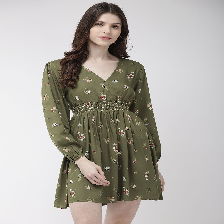

In [120]:
image = load_img('E:assi/images/pic_45.jpg', target_size=(224,224))
image

In [121]:
image = load_img('E:assi/images/pic_45.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [123]:
pred_mat = material_model.predict(image)
pred_pat = pattern_model.predict(image)
pred_nec = neckline_model.predict(image)


## Predicted class for material
pred_Mat = np.argmax(pred_mat)
pred_Mat = Materials[pred_Mat]
## predicted class for Pattern
pred_Pat = np.argmax(pred_pat)
pred_Pat = Patterns[pred_Pat]
## Predicted class for Neckline
pred_Nec = np.argmax(pred_nec)
pred_Nec = Necklines[pred_Nec]

In [124]:

print(f"Therefore, the Material, Pattern and Necline for the above downloaded image is: {pred_Mat} {pred_Pat} {pred_Nec}")

Therefore, the Material, Pattern and Necline for the above downloaded image is: Cotton Floral V-Neck


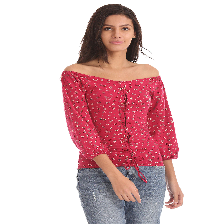

In [129]:
image = load_img('E:assi/images/pic_47.jpg', target_size=(224,224))
image

In [130]:
image = load_img('E:assi/images/pic_47.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [131]:
pred_mat = material_model.predict(image)
pred_pat = pattern_model.predict(image)
pred_nec = neckline_model.predict(image)


## Predicted class for material
pred_Mat = np.argmax(pred_mat)
pred_Mat = Materials[pred_Mat]
## predicted class for Pattern
pred_Pat = np.argmax(pred_pat)
pred_Pat = Patterns[pred_Pat]
## Predicted class for Neckline
pred_Nec = np.argmax(pred_nec)
pred_Nec = Necklines[pred_Nec]

In [132]:
print(f"Therefore, the Material, Pattern and Necline for the above downloaded image is: {pred_Mat} {pred_Pat} {pred_Nec}")

Therefore, the Material, Pattern and Necline for the above downloaded image is: Cotton Printed Round Neck
